<a href="https://colab.research.google.com/github/asgharlaib/Project_v1/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
full_df = pd.read_csv("/content/drive/MyDrive/LCL-June2015v2_134.csv")
full_df.head(n=10)

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC005555,Std,2012-06-15 03:30:00.0000000,0.118
1,MAC005555,Std,2012-06-15 04:00:00.0000000,0.078
2,MAC005555,Std,2012-06-15 04:30:00.0000000,0.091
3,MAC005555,Std,2012-06-15 05:00:00.0000000,0.068
4,MAC005555,Std,2012-06-15 05:30:00.0000000,0.092
5,MAC005555,Std,2012-06-15 06:00:00.0000000,0.194
6,MAC005555,Std,2012-06-15 06:30:00.0000000,0.091
7,MAC005555,Std,2012-06-15 07:00:00.0000000,0.069
8,MAC005555,Std,2012-06-15 07:30:00.0000000,0.088
9,MAC005555,Std,2012-06-15 08:00:00.0000000,0.087


In [19]:
full_df_copy = full_df.copy()

In [20]:
print(f"full_df columns datatypes: {full_df.dtypes} \n")

full_df columns datatypes: LCLid                      object
stdorToU                   object
DateTime                   object
KWH/hh (per half hour)     object
dtype: object 



In [21]:
full_df['DateTime'] = pd.to_datetime(full_df['DateTime'])

print(f"full_df columns datatypes: {full_df.dtypes} \n")

full_df columns datatypes: LCLid                              object
stdorToU                           object
DateTime                   datetime64[ns]
KWH/hh (per half hour)             object
dtype: object 



In [22]:
df_8am = full_df[full_df['DateTime'].dt.time == pd.to_datetime('08:00').time()]
print(df_8am.head)


<bound method NDFrame.head of             LCLid stdorToU            DateTime KWH/hh (per half hour) 
9       MAC005555      Std 2012-06-15 08:00:00                  0.087 
57      MAC005555      Std 2012-06-16 08:00:00                  0.092 
105     MAC005555      Std 2012-06-17 08:00:00                  0.072 
154     MAC005555      Std 2012-06-18 08:00:00                  0.105 
202     MAC005555      Std 2012-06-19 08:00:00                   0.09 
...           ...      ...                 ...                     ...
999772  MAC000146      ToU 2012-08-12 08:00:00                  0.125 
999820  MAC000146      ToU 2012-08-13 08:00:00                  0.177 
999868  MAC000146      ToU 2012-08-14 08:00:00                   0.16 
999916  MAC000146      ToU 2012-08-15 08:00:00                  0.116 
999964  MAC000146      ToU 2012-08-16 08:00:00                  0.108 

[20803 rows x 4 columns]>


In [23]:
##Descriptive Analysis
#Dataframe column names
print(f"Column names: {list(df_8am.columns)} \n")

#Dataframe shape
print(f"df_8am shape: {df_8am.shape} \n")

#Dataframe datatypes
print(f"df_8am columns datatypes: {df_8am.dtypes} \n")

#Looking for missing values
print(f"missing values: {df_8am.isnull().sum()} \n")

Column names: ['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) '] 

df_8am shape: (20803, 4) 

df_8am columns datatypes: LCLid                              object
stdorToU                           object
DateTime                   datetime64[ns]
KWH/hh (per half hour)             object
dtype: object 

missing values: LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64 



In [24]:
##Descriptive Statistics
df_8am.describe()

,DateTime
count,20803
mean,2013-01-31 20:37:33.136567040
min,2011-11-24 08:00:00
25%,2012-07-26 08:00:00
50%,2013-02-06 08:00:00
75%,2013-08-13 08:00:00
max,2014-02-27 08:00:00


Text(0.5, 1.0, 'Standard vs Dynamic Time of Use Distribution')

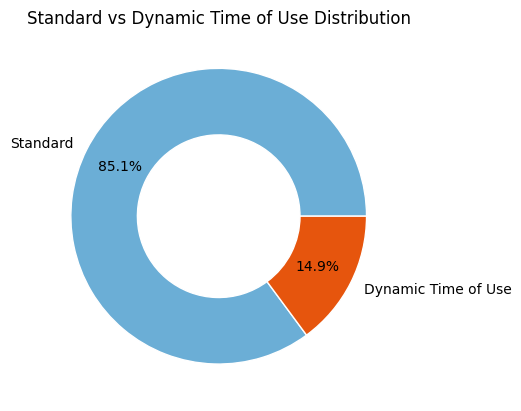

In [25]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of households in std or ToU pricing Scheme
total_number = df_8am['stdorToU'].value_counts()

# Pie Chart to show distribution
ax.pie(
    np.array(total_number),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Standard','Dynamic Time of Use']
);
plt.title("Standard vs Dynamic Time of Use Distribution")


In [26]:
df_8am_2014 = df_8am[(df_8am['DateTime'].dt.year == 2014)]
df_8am_2014_copy = df_8am_2014.copy()

In [27]:
# Convert the 'DateTime' column to datetime type
df_8am['DateTime'] = pd.to_datetime(df_8am['DateTime'])

# Extract the date and time into separate columns
df_8am['Date'] = df_8am['DateTime'].dt.date
df_8am['Time'] = df_8am['DateTime'].dt.time

# Display the first few rows to verify
print(df_8am.head())

         LCLid stdorToU            DateTime KWH/hh (per half hour)   \
9    MAC005555      Std 2012-06-15 08:00:00                  0.087    
57   MAC005555      Std 2012-06-16 08:00:00                  0.092    
105  MAC005555      Std 2012-06-17 08:00:00                  0.072    
154  MAC005555      Std 2012-06-18 08:00:00                  0.105    
202  MAC005555      Std 2012-06-19 08:00:00                   0.09    

           Date      Time  
9    2012-06-15  08:00:00  
57   2012-06-16  08:00:00  
105  2012-06-17  08:00:00  
154  2012-06-18  08:00:00  
202  2012-06-19  08:00:00  


<ipython-input-27-d74e9ec30bb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8am['DateTime'] = pd.to_datetime(df_8am['DateTime'])
<ipython-input-27-d74e9ec30bb5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8am['Date'] = df_8am['DateTime'].dt.date
<ipython-input-27-d74e9ec30bb5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

                         LCLid stdorToU KWH/hh (per half hour)         Date  \
DateTime                                                                      
2012-06-15 08:00:00  MAC005555      Std                  0.087   2012-06-15   
2012-06-16 08:00:00  MAC005555      Std                  0.092   2012-06-16   
2012-06-17 08:00:00  MAC005555      Std                  0.072   2012-06-17   
2012-06-18 08:00:00  MAC005555      Std                  0.105   2012-06-18   
2012-06-19 08:00:00  MAC005555      Std                   0.09   2012-06-19   

                         Time  
DateTime                       
2012-06-15 08:00:00  08:00:00  
2012-06-16 08:00:00  08:00:00  
2012-06-17 08:00:00  08:00:00  
2012-06-18 08:00:00  08:00:00  
2012-06-19 08:00:00  08:00:00  
                         LCLid stdorToU KWH/hh (per half hour)         Date  \
DateTime                                                                      
2012-06-02 08:00:00  MAC000005      ToU                   0.04  

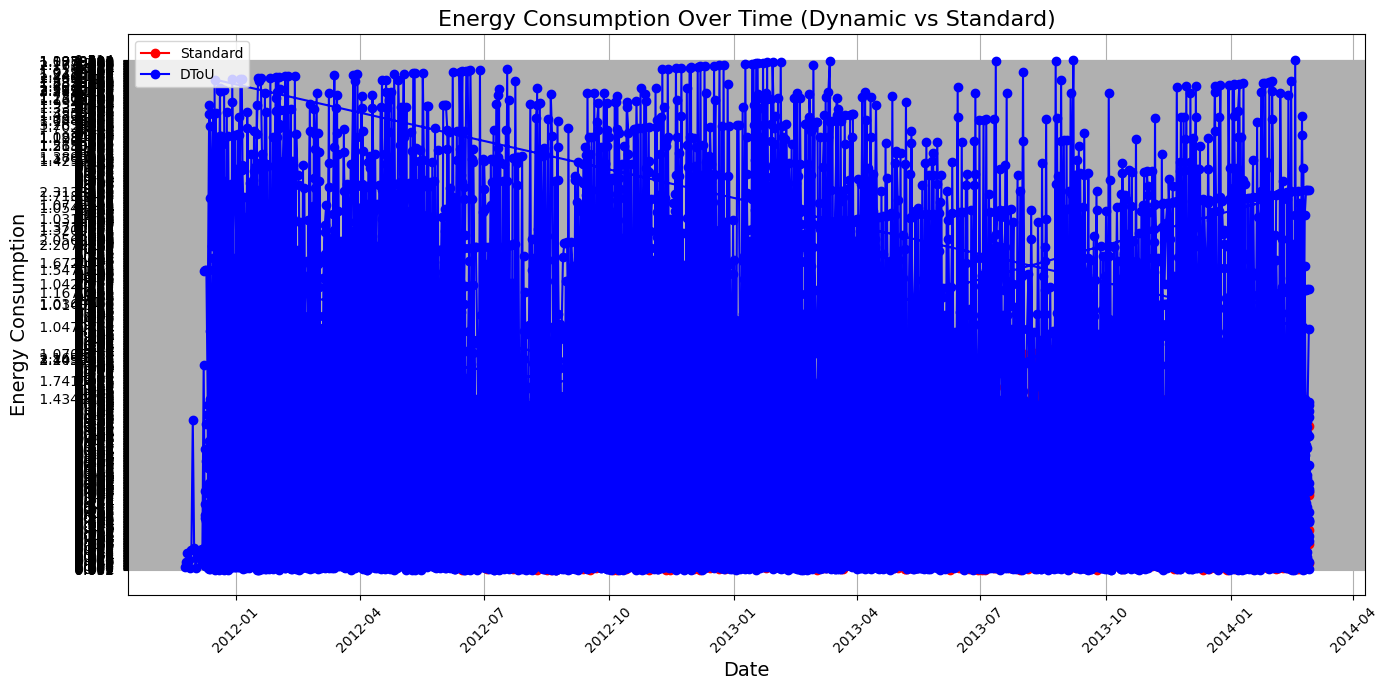

In [29]:
# Filter for dynamic and standard pricing
df_dynamic = df_8am[df_8am['stdorToU'] == 'ToU']
df_standard = df_8am[df_8am['stdorToU'] == 'Std']

# Set the 'date' column as the index for both DataFrames
df_dynamic.set_index('DateTime', inplace=True)
df_standard.set_index('DateTime', inplace=True)
print(df_standard.head())
print(df_dynamic.head())
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df_standard.index, df_standard['KWH/hh (per half hour) '], marker='o', linestyle='-', color='r', label='Standard')
plt.plot(df_dynamic.index, df_dynamic['KWH/hh (per half hour) '], marker='o', linestyle='-', color='b', label='DToU')
# Formatting the plot
plt.title('Energy Consumption Over Time (Dynamic vs Standard)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy Consumption', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
# Function to preprocess the data for LSTM
def preprocess_data(df, time_step=1):
    data = df['KWH/hh (per half hour) '].values
    data = data.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    X = np.array(X)
    y = np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

In [31]:
# Preprocess the data
time_step = 8  # number of previous timesteps to use for prediction
X_dynamic, y_dynamic, scaler_dynamic = preprocess_data(df_dynamic, time_step)
X_standard, y_standard, scaler_standard = preprocess_data(df_standard, time_step)

# Split the data into training and testing sets
X_train_dyn, X_test_dyn, y_train_dyn, y_test_dyn = train_test_split(X_dynamic, y_dynamic, test_size=0.2, random_state=42)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_standard, y_standard, test_size=0.2, random_state=42)

In [32]:
# Define the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(input_shape[1], input_shape[2])))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [33]:
# Build and train the model for dynamic TOU
model_dynamic = build_lstm_model(X_train_dyn.shape)
history_dynamic = model_dynamic.fit(X_train_dyn, y_train_dyn, batch_size=1, epochs=1)

# Build and train the model for standard users
model_standard = build_lstm_model(X_train_std.shape)
history_standard = model_standard.fit(X_train_std, y_train_std, batch_size=1, epochs=1)

2468/2468 [==============================] - 15s 5ms/step - loss: 0.0027
